## Common

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.over_sampling import SMOTE

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data import & preprocessing

In [2]:
data_with_attack = pd.read_csv('gdrive/MyDrive/COMP DATA5703/SWAT_with_attack_cleaning_sampling.csv')
data_with_attack.head()

,Row,Class,P203,MV101,AIT203,AIT202,FIT301,AIT401,PIT502,FIT501,...,FIT101,DPIT301,FIT504,LIT401,AIT501,FIT601,LIT301,P102,FIT201,FIT401
0,30,1,2,2,328.6337,8.390669,2.212215,148.808,1.649953,1.727250,...,2.527624,19.68756,0.306569,946.2958,7.878621,0.000128,957.6071,1,2.439881,1.717361
1,60,1,2,2,328.5055,8.391951,2.207347,148.808,1.649953,1.726609,...,2.649329,19.70677,0.306569,946.1036,7.878621,0.000128,959.7299,1,2.442700,1.719924
2,90,1,2,2,328.4286,8.391951,2.209653,148.808,1.569859,1.727378,...,2.620824,19.60433,0.306505,950.5255,7.878621,0.000128,959.5697,1,2.444751,1.719924
3,120,1,2,2,328.4286,8.391630,2.212600,148.808,1.665972,1.725327,...,2.586875,19.65555,0.308426,954.1015,7.877019,0.000128,961.0116,1,2.440137,1.716849
4,150,1,2,2,328.1210,8.391630,2.208756,148.808,1.665972,1.727890,...,2.542677,19.73558,0.308939,955.5242,7.877660,0.000128,963.6151,1,2.440393,1.717233


In [3]:
data_all_normal = pd.read_csv('gdrive/MyDrive/COMP DATA5703/SWAT_all_normal_data_cleaning_sampling.csv')
data_all_normal.head()

,Row,Class,P203,MV101,AIT203,AIT202,FIT301,AIT401,PIT502,FIT501,...,FIT101,DPIT301,FIT504,LIT401,AIT501,FIT601,LIT301,P102,FIT201,FIT401
0,30,1,1,1,312.9198,8.313766,0.000256,0.0,0.0,0.001538,...,0.0,2.560983,0.0,133.5811,7.444758,0.000256,137.8252,1,0.0,0.0
1,60,1,1,1,313.1761,8.310242,0.000256,0.0,0.0,0.001538,...,0.0,2.560983,0.0,132.8121,7.443476,0.000256,138.1056,1,0.0,0.0
2,90,1,1,1,313.3299,8.308319,0.000256,0.0,0.0,0.001538,...,0.0,2.560983,0.0,133.2351,7.445399,0.000256,137.7051,1,0.0,0.0
3,120,1,1,1,313.4581,8.315048,0.000256,0.0,0.0,0.001538,...,0.0,2.564185,0.0,132.8890,7.444758,0.000256,137.0242,1,0.0,0.0
4,150,1,1,1,313.5863,8.310562,0.000256,0.0,0.0,0.001538,...,0.0,2.564185,0.0,132.2738,7.443476,0.000256,136.4234,1,0.0,0.0


In [4]:
data_with_attack.shape, data_all_normal.shape

((13862, 33), (16500, 33))

In [5]:
data_with_attack.dropna(inplace=True)

**PCA** does not work well:
1.   The proportion of abnormal data is small
2.   Unimportant features have high variance
**LDA Test here:**

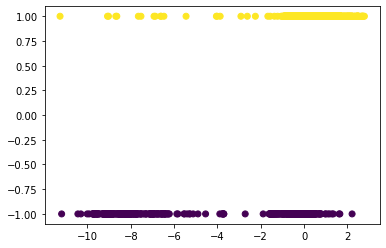

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_test = data_with_attack.iloc[:, 1:-1].to_numpy().astype(np.float32) # with attack
Y_test = data_with_attack['Class'].to_numpy().astype(np.float32)
lda = LinearDiscriminantAnalysis()
lda.fit(X_test, Y_test)
X_test = lda.transform(X_test)
plt.scatter(X_test[:, 0], Y_test, marker='o', c=Y_test)
plt.show()

In [7]:
# Scale and PCA/LDA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_test = data_with_attack.iloc[:, 1:-1].to_numpy().astype(np.float32) # with attack
Y_test = data_with_attack['Class'].to_numpy().astype(np.float32)
X_train = data_all_normal.iloc[:, 1:-1].to_numpy().astype(np.float32) # all normal
"""
# Because abnormal data is few, we should increase the proportion of abnormal data before PCA to contain the feature of abnormal data
X_attack = data_with_attack[data_with_attack['Class'] == -1].iloc[:, 1:-1].to_numpy().astype(np.float32) # only attack
# increase attack data
X_alter_for_PCA = X_attack
for i in range(20):
  X_alter_for_PCA = np.concatenate((X_alter_for_PCA, X_attack))

pca = PCA(n_components=.99).fit(np.concatenate((X_train, X_test, X_alter_for_PCA)))
X_test = pca.transform(X_test)
X_train = pca.transform(X_train)
"""

lda = LinearDiscriminantAnalysis()
lda.fit(X_test, Y_test)
X_test = lda.transform(X_test)
X_train = lda.transform(X_train)

# Pre-process
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler1 = StandardScaler()

scaler1.fit(np.concatenate((X_train, X_test)))
X_train = scaler1.transform(X_train)
X_test = scaler1.transform(X_test)
scaler.fit(np.concatenate((X_train, X_test)))
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((16500, 1), (13862, 1))

In [8]:
data_with_attack_lda = pd.DataFrame(X_test)
data_with_attack_lda['Class'] = data_with_attack['Class']

data_all_normal_lda = pd.DataFrame(X_train)
data_all_normal_lda['Class'] = data_all_normal['Class']

In [9]:
data_with_attack_lda.isna().sum(), data_all_normal_lda.isna().sum()

(0        0
 Class    0
 dtype: int64, 0        0
 Class    0
 dtype: int64)

In [10]:
data_with_attack_lda.shape, data_all_normal_lda.shape

((13862, 2), (16500, 2))

## VAE-LSTM

In [18]:
class Data_Process(object):

    def __init__(self,dataset,columns,time_steps):
        self.time_steps = time_steps
        self.data = dataset
        self.columns = columns
        self.data[self.columns] = self.data[self.columns].shift(-1) - self.data[self.columns]
        self.data = self.data.dropna(how='any')
        self.pt= 0
        self.all_data = np.array([])
        self.labels = np.array([])
        
    def _process_data(self, is_smote=False):
        self._data_arrange(is_smote)

    def _data_arrange(self, is_smote=False):
        array_length = self.data.shape[0]-self.time_steps+1
        self.all_data = np.zeros(shape=(array_length, self.time_steps, len(self.columns)))
        self.labels = np.zeros(shape=(array_length))
        column_array = self.data[self.columns].values  
        label_array = self.data['Class'].values
        for i in range(array_length):
            column_array_reshape = column_array[i:i+self.time_steps].reshape((-1,self.time_steps,len(self.columns)))
            timesteps_label = label_array[i:i+self.time_steps]
            # print(self.labels.shape)
            label_reshape = timesteps_label[-1]
            self.all_data[i] = column_array_reshape
            self.labels[i] = label_reshape 
        # after arraging time_step data, we can shffule or smote here to avoid loss -> inf by unbalance features
        if is_smote:
            smote = SMOTE()
            all_data_for_remote = self.all_data.reshape(-1,self.time_steps*len(self.columns))
            all_data_for_remote,self.labels = smote.fit_resample(all_data_for_remote,self.labels)
            self.all_data = all_data_for_remote.reshape(-1,self.time_steps,len(self.columns))
        rng_state = np.random.get_state()
        np.random.shuffle(self.all_data)
        np.random.set_state(rng_state)
        np.random.shuffle(self.labels)

    def retrive_data(self,batch_size):
        batch_train = None
        if self.all_data.shape[0] < batch_size:
            batch_train = self.all_data
        else:
            if (self.pt + 1) * batch_size >= self.all_data.shape[0]:
                self.pt = 0
                batch_train = self.all_data[self.pt * batch_size:,]
            else:
                batch_train = self.all_data[self.pt * batch_size:(self.pt + 1) * batch_size,]
                self.pt = self.pt + 1
        if batch_train.ndim < self.all_data.ndim:
            batch_trainn = np.expand_dims(batch_train,0)
        return batch_train

#data_source_all_normal_class = Data_Process(data_all_normal_pca, column_names, time_steps=32)
#data_source_all_normal_class._process_data()
#data_source_all_normal_class.retrive_data(128).shape

In [19]:
def leak_relu(x, leak=0.2, name='leak_relu'):
	return tf.maximum(x, leak*x)


def get_lstm_cell(unit_list, act_fn_list):
    return tf.keras.layers.StackedRNNCells([tf.keras.layers.LSTMCell(unit, activation=act_fn) for unit,act_fn in zip(unit_list,act_fn_list)])

In [20]:
column_names = list(data_with_attack_lda.columns)
column_names.remove('Class')

In [21]:
class VAE_LSTM(object):
    def __init__(self, train_data, test_data, columns, z_sample_dim, time_steps, outlier_fraction, epochs, latent_dims, learning_rate=0.001):
        tf.compat.v1.reset_default_graph()
        self.outlier_fraction = outlier_fraction
        self.data_train= Data_Process(train_data, columns, time_steps=time_steps)
        self.data_train._process_data()
        self.data_length = self.data_train.all_data.shape[0]
        self.data_test = Data_Process(test_data, columns, time_steps=time_steps)
        self.data_test._process_data(is_smote=True)
        self.latent_dims = latent_dims
        self.batch_size = 128
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.input_dim = len(columns)
        self.z_sample_dim = z_sample_dim
        self.time_steps = time_steps
    
        self.pt = 0 
        self.score = 0
        self.session = tf.compat.v1.Session()
        self._network()
        self.session.run(tf.compat.v1.global_variables_initializer())

        
    def _network(self):
        with tf.compat.v1.variable_scope('ph'):
            tf.compat.v1.disable_eager_execution()
            self.X = tf.compat.v1.placeholder(tf.float32, shape=[None,self.time_steps,self.input_dim], name='X_input')
            # print(input_dimm, self.X.shape)

        with tf.compat.v1.variable_scope('encoder'):
            with tf.compat.v1.variable_scope('latent_mu'):
                lstm_mu_cell_1 = get_lstm_cell([self.z_sample_dim], [leak_relu])
                lstm_mu_cell_2 = get_lstm_cell([self.z_sample_dim], [leak_relu])

                (mu_output_1, mu_output_2),_ = tf.compat.v1.nn.bidirectional_dynamic_rnn(lstm_mu_cell_1, lstm_mu_cell_2, self.X, dtype=tf.float32)
                Z_mean = tf.add(mu_output_1, mu_output_2)
                
            with tf.compat.v1.variable_scope('latent_sigma'):
                lstm_sigma_cell_1 = get_lstm_cell([self.z_sample_dim], [tf.nn.softplus])
                lstm_sigma_cell_2 = get_lstm_cell([self.z_sample_dim], [tf.nn.softplus])
                (sigma_output_1, sigma_output_2),_ = tf.compat.v1.nn.bidirectional_dynamic_rnn(lstm_sigma_cell_1, lstm_sigma_cell_2, self.X, dtype=tf.float32)
                Z_log_sigma = tf.add(sigma_output_1, sigma_output_2)
                epsilon = tf.compat.v1.random_normal(tf.shape(Z_mean), 0,1, dtype=tf.float32)
                Z_sample = Z_mean + Z_log_sigma * epsilon
        
        with tf.compat.v1.variable_scope('decoder'):
            lstm_cell = get_lstm_cell([self.latent_dims,self.input_dim], [leak_relu, leak_relu])
            self.reconX,_ = tf.compat.v1.nn.dynamic_rnn(lstm_cell, Z_sample, dtype=tf.float32)
 
        with tf.compat.v1.variable_scope('loss'):
            backend_dims = np.arange(1,tf.keras.backend.ndim(self.X))
            reconX_loss = tf.losses.mean_squared_error(self.X, self.reconX)
            kl_loss = - 0.5 * tf.reduce_mean(1 + Z_log_sigma - tf.square(Z_mean) - tf.exp(Z_log_sigma))
            self.loss = reconX_loss + kl_loss
            self.vae_lstm_loss = tf.compat.v1.reduce_sum(tf.square(self.X - self.reconX), reduction_indices=backend_dims)
          

        with tf.compat.v1.variable_scope('train'):
            self.train_optim = tf.compat.v1.train.AdamOptimizer(self.learning_rate).minimize(self.loss)
            
            
    def train(self):
        for epoch in range(self.epochs):
            # print(math.ceil((float)(self.data_length)/self.batch_size), self.data_length, self.batch_size)
            for i in range(math.ceil((float)(self.data_length)/self.batch_size)):
                self.data_train.pt = 1
                this_X = self.data_train.retrive_data(self.batch_size)
                # print(this_X)
                self.session.run([self.train_optim],feed_dict={self.X: this_X})
            
            if epoch % 10 == 9:
                mse_loss = self.session.run([self.loss],feed_dict={self.X: self.data_train.all_data})
                print('Epoch {}/{}: with loss: {}'.format(epoch+1, self.epochs, np.average(mse_loss)))
        self._recon_score(self.data_train.all_data)
    
    def _recon_score(self,input_data):       
        input_vae_lstm_loss = self.session.run(self.vae_lstm_loss,feed_dict={self.X: input_data})
        self.score = np.percentile(input_vae_lstm_loss, (1-self.outlier_fraction)*100)
       
    def anomaly(self,test):
        test_data_loss = self.session.run(self.vae_lstm_loss,feed_dict={self.X: test})
        anomaly_result = map(lambda x: 1 if x< self.score else -1,test_data_loss)
        return list(anomaly_result)

    def return_labels(self):
        return self.data_test.labels, self.anomaly(self.data_test.all_data)

#### Best hyperparameters

In [22]:
# outlier_fraction: too small will be robust with abnormal data, too big will be refuse normal data
VAE_LSTM_4 = VAE_LSTM(data_all_normal_lda, data_with_attack_lda, column_names, z_sample_dim=3, time_steps=64, outlier_fraction=0.01, epochs=40, latent_dims=32, learning_rate=0.001)
print("Using LDA!!")
print("z_sample_dim=3, time_steps=64, outlier_fraction=0.01, epochs=40, latent_dims=32, learning_rate=0.001")
VAE_LSTM_4.train()
labels_after_smote, predict_label_4 = VAE_LSTM_4.return_labels()
print(classification_report(labels_after_smote, predict_label_4))

Using LDA!!
z_sample_dim=3, time_steps=64, outlier_fraction=0.01, epochs=40, latent_dims=32, learning_rate=0.001
Epoch 10/40: with loss: 0.090866319835186
Epoch 20/40: with loss: 0.03824806958436966
Epoch 30/40: with loss: 0.018558377400040627
Epoch 40/40: with loss: 0.009370784275233746
              precision    recall  f1-score   support

        -1.0       0.90      0.52      0.66     13113
         1.0       0.66      0.94      0.78     13113

    accuracy                           0.73     26226
   macro avg       0.78      0.73      0.72     26226
weighted avg       0.78      0.73      0.72     26226



In [24]:
# outlier_fraction: too small will be robust with abnormal data, too big will be refuse normal data
VAE_LSTM_5 = VAE_LSTM(data_all_normal_lda, data_with_attack_lda, column_names, z_sample_dim=3, time_steps=64, outlier_fraction=0.01, epochs=40, latent_dims=32, learning_rate=0.001)
print("Using LDA!!")
print("z_sample_dim=3, time_steps=64, outlier_fraction=0.01, epochs=40, latent_dims=32, learning_rate=0.001")
VAE_LSTM_5.train()
labels_after_smote, predict_label_5 = VAE_LSTM_5.return_labels()
print(classification_report(labels_after_smote, predict_label_5))

Using LDA!!
z_sample_dim=3, time_steps=64, outlier_fraction=0.01, epochs=40, latent_dims=32, learning_rate=0.001
Epoch 10/40: with loss: 0.0767865926027298
Epoch 20/40: with loss: 0.03199316933751106
Epoch 30/40: with loss: 0.015557612292468548
Epoch 40/40: with loss: 0.008018500171601772
              precision    recall  f1-score   support

        -1.0       0.90      0.52      0.66     13111
         1.0       0.66      0.94      0.78     13111

    accuracy                           0.73     26222
   macro avg       0.78      0.73      0.72     26222
weighted avg       0.78      0.73      0.72     26222



#### Other hyperparameters testing

In [25]:
# outlier_fraction: too small will be robust with abnormal data, too big will be refuse normal data
VAE_LSTM_1 = VAE_LSTM(data_all_normal_lda, data_with_attack_lda, column_names, z_sample_dim=3, time_steps=32, outlier_fraction=0.1, epochs=40, latent_dims=32, learning_rate=0.001)
print("Using LDA!!")
print("z_sample_dim=3, time_steps=32, outlier_fraction=0.1, epochs=40, latent_dims=32, learning_rate=0.001")
VAE_LSTM_1.train()
labels_after_smote, predict_label_1 = VAE_LSTM_1.return_labels()
print(classification_report(labels_after_smote, predict_label_1))

Using LDA!!
z_sample_dim=3, time_steps=32, outlier_fraction=0.1, epochs=40, latent_dims=32, learning_rate=0.001
Epoch 10/40: with loss: 0.07244569808244705
Epoch 20/40: with loss: 0.030086228623986244
Epoch 30/40: with loss: 0.015052284114062786
Epoch 40/40: with loss: 0.008308272808790207
              precision    recall  f1-score   support

        -1.0       0.83      0.49      0.61     13137
         1.0       0.64      0.90      0.75     13137

    accuracy                           0.69     26274
   macro avg       0.73      0.69      0.68     26274
weighted avg       0.73      0.69      0.68     26274



In [26]:
# outlier_fraction: too small will be robust with abnormal data, too big will be refuse normal data
VAE_LSTM_2 = VAE_LSTM(data_all_normal_lda, data_with_attack_lda, column_names, z_sample_dim=3, time_steps=32, outlier_fraction=0.01, epochs=40, latent_dims=32, learning_rate=0.001)
print("Using LDA!!")
print("z_sample_dim=3, time_steps=32, outlier_fraction=0.01, epochs=40, latent_dims=32, learning_rate=0.001")
VAE_LSTM_2.train()
labels_after_smote, predict_label_2 = VAE_LSTM_2.return_labels()
print(classification_report(labels_after_smote, predict_label_2))

Using LDA!!
z_sample_dim=3, time_steps=32, outlier_fraction=0.01, epochs=40, latent_dims=32, learning_rate=0.001
Epoch 10/40: with loss: 0.09473664313554764
Epoch 20/40: with loss: 0.0443907268345356
Epoch 30/40: with loss: 0.024797240272164345
Epoch 40/40: with loss: 0.015427250415086746
              precision    recall  f1-score   support

        -1.0       0.93      0.46      0.61     13136
         1.0       0.64      0.96      0.77     13136

    accuracy                           0.71     26272
   macro avg       0.78      0.71      0.69     26272
weighted avg       0.78      0.71      0.69     26272



In [27]:
# outlier_fraction: too small will be robust with abnormal data, too big will be refuse normal data
VAE_LSTM_3 = VAE_LSTM(data_all_normal_lda, data_with_attack_lda, column_names, z_sample_dim=3, time_steps=32, outlier_fraction=0.02, epochs=40, latent_dims=32, learning_rate=0.001)
print("Using LDA!!")
print("z_sample_dim=3, time_steps=32, outlier_fraction=0.02, epochs=40, latent_dims=32, learning_rate=0.001")
VAE_LSTM_3.train()
labels_after_smote, predict_label_3 = VAE_LSTM_3.return_labels()
print(classification_report(labels_after_smote, predict_label_3))

Using LDA!!
z_sample_dim=3, time_steps=32, outlier_fraction=0.02, epochs=40, latent_dims=32, learning_rate=0.001
Epoch 10/40: with loss: 0.10990281403064728
Epoch 20/40: with loss: 0.057437606155872345
Epoch 30/40: with loss: 0.037935417145490646
Epoch 40/40: with loss: 0.02888563647866249
              precision    recall  f1-score   support

        -1.0       0.91      0.45      0.60     13135
         1.0       0.64      0.95      0.76     13135

    accuracy                           0.70     26270
   macro avg       0.77      0.70      0.68     26270
weighted avg       0.77      0.70      0.68     26270

